In [1]:
import scanpy as sc
import scvi
import numpy as np 
import pandas as pd
import torch.nn.functional as F

In [2]:
sc.set_figure_params(figsize=(4, 4))

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [3]:
class PreSCVI(scvi.model.SCVI):
    def __init__(self, adata, input_key, **model_kwargs):
        super().__init__(adata, **model_kwargs)
        self.input_key = input_key

    def _get_inference_input(self, tensors):
        x = self.adata.obsm[self.input_key]
        return dict(x=x)

    def _get_generative_input(self, tensors, inference_outputs):
        x = tensors["X"]
        return dict(x=x, z=inference_outputs["qz_m"])

    def _compute_reconstruction_loss(self, generative_outputs, target, **kwargs):
        x_hat = generative_outputs["px_rate"]
        return F.mse_loss(x_hat, target)

### UCE-scVI adaption for mice dataset

In [17]:
# dataset_name = '10x-Multiome-Pbmc10k-small'
dataset_name = 'Chen-2019-small'
rna = sc.read(f"/ailab/user/liuxinyuan/projects/scmbench/datasets/{dataset_name}/{dataset_name}-RNA.h5ad")
atac = sc.read(f"/ailab/user/liuxinyuan/projects/scmbench/datasets/{dataset_name}/{dataset_name}-ATAC.h5ad")

/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [18]:
rna_emb = pd.read_csv(f'/ailab/user/liuxinyuan/projects/scmbench/evaluation/UCE-zero-output/{dataset_name}/{dataset_name}-RNA_uce.csv',index_col=0,header=None)
rna_emb = rna_emb.values 
atac_emb = pd.read_csv(f'/ailab/user/liuxinyuan/projects/scmbench/evaluation/UCE-zero-output/{dataset_name}/{dataset_name}-ATAC_uce.csv',index_col=0,header=None)
atac_emb = atac_emb.values 

In [19]:
both=np.concatenate([rna_emb,atac_emb],axis=1)
adata = sc.concat([rna,atac],axis=1)
adata.obsm['X_FM'] = both
adata.obs['cell_type'] = rna.obs['cell_type']

In [22]:
PreSCVI.setup_anndata(adata)
vae = PreSCVI(adata, input_key="X_FM", n_layers=2, n_latent=30, gene_likelihood="nb")
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()

ERROR! Session/line number was not unique in database. History logging moved to new session 172


/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /ailab/user/liuxinyuan/.conda/envs/perturb/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /ailab/user/liuxinyuan/.conda/envs/perturb/lib/pytho ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:4

Epoch 400/400: 100%|██████████| 400/400 [08:49<00:00,  1.28s/it, v_num=1, train_loss_step=4.34e+3, train_loss_epoch=4.3e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [08:49<00:00,  1.32s/it, v_num=1, train_loss_step=4.34e+3, train_loss_epoch=4.3e+3]


/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


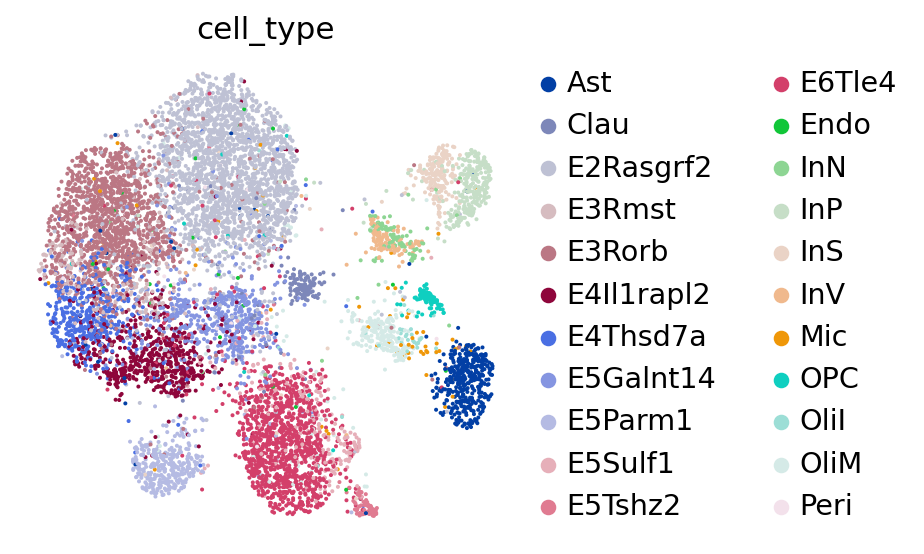

In [23]:
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata, min_dist=0.3)
fig = sc.pl.umap(
    adata,
    color=["cell_type"],
    frameon=False,
    return_fig=True,
    show=False,
)

/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


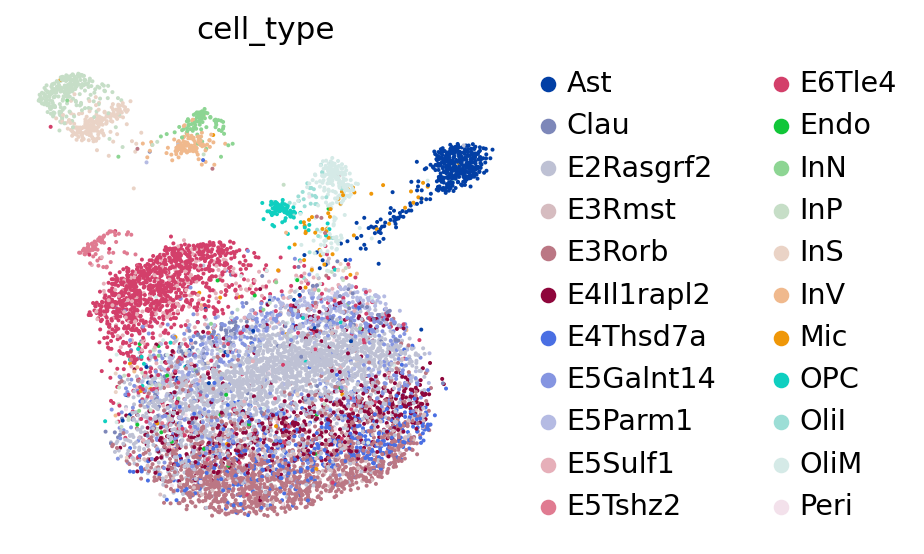

In [9]:
sc.pp.neighbors(adata, use_rep="X_FM")
sc.tl.umap(adata, min_dist=0.3)
fig = sc.pl.umap(
    adata,
    color=["cell_type"],
    frameon=False,
    return_fig=True,
    show=False,
    # palette='default_26'
)

### scGPT-scVI adaption for human dataset

load anndata

In [24]:
dataset_name = '10x-Multiome-Pbmc10k-small'
rna = sc.read(f"/ailab/user/liuxinyuan/projects/scmbench/datasets/{dataset_name}/{dataset_name}-RNA.h5ad")
atac = sc.read(f"/ailab/user/liuxinyuan/projects/scmbench/datasets/{dataset_name}/{dataset_name}-ATAC.h5ad")

/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


load FM-zeroshot embedding for RNA and ATAC module

In [25]:
rna_emb = pd.read_csv(f'/ailab/user/liuxinyuan/projects/scmbench/evaluation/scGPT-zero-output/{dataset_name}/{dataset_name}-human-rna.csv',index_col=0,header=None)
rna_emb = rna_emb.values 
atac_emb = pd.read_csv(f'/ailab/user/liuxinyuan/projects/scmbench/evaluation/scGPT-zero-output/{dataset_name}/{dataset_name}-human-atac.csv',index_col=0,header=None)
atac_emb = atac_emb.values 

prepare concatenated data

In [26]:
both=np.concatenate([rna_emb,atac_emb],axis=1)
adata = sc.concat([rna,atac],axis=1)
adata.obsm['X_FM'] = both
adata.obs['cell_type'] = rna.obs['cell_type']

In [27]:
PreSCVI.setup_anndata(adata)
vae = PreSCVI(adata, input_key="X_FM", n_layers=2, n_latent=30, gene_likelihood="nb")
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()

/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /ailab/user/liuxinyuan/.conda/envs/perturb/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /ailab/user/liuxinyuan/.conda/envs/perturb/lib/pytho ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:4

Epoch 400/400: 100%|██████████| 400/400 [09:33<00:00,  1.43s/it, v_num=1, train_loss_step=2.07e+4, train_loss_epoch=2.19e+4]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [09:33<00:00,  1.43s/it, v_num=1, train_loss_step=2.07e+4, train_loss_epoch=2.19e+4]


UMAP visualization of FM-adapt embeddings and FM-zeroshot embeddings

/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


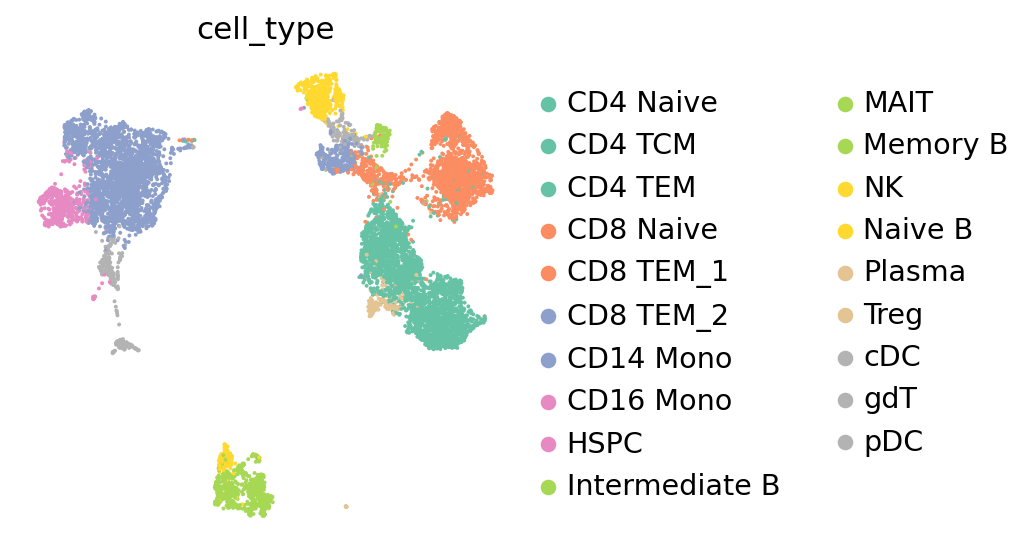

In [28]:
# adata.obsm['X_scVI'] = emb.values
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata, min_dist=0.3)
fig = sc.pl.umap(
    adata,
    color=["cell_type"],
    frameon=False,
    return_fig=True,
    show=False,
    palette='Set2',
)

/ailab/user/liuxinyuan/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


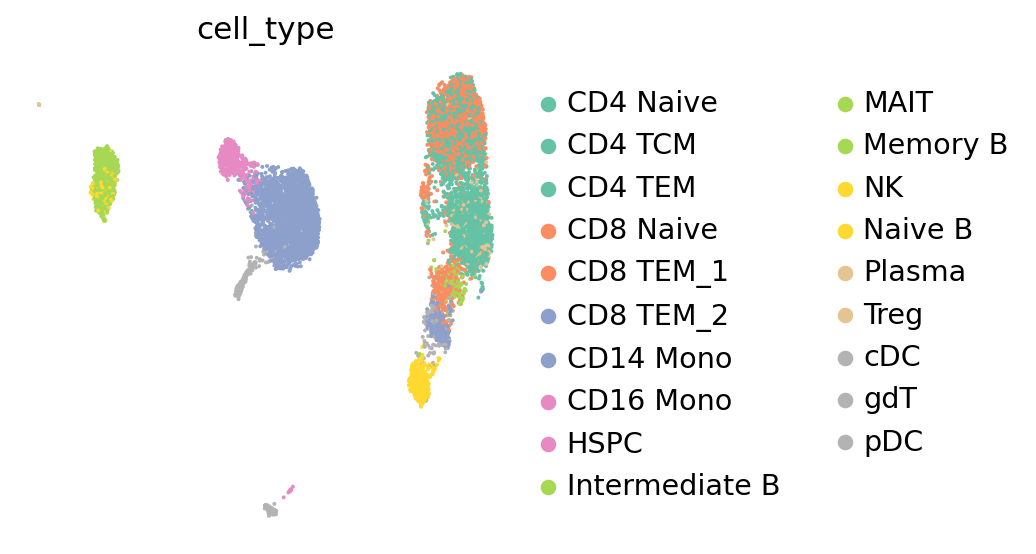

In [13]:
sc.pp.neighbors(adata, use_rep="X_FM")
sc.tl.umap(adata, min_dist=0.3)
fig = sc.pl.umap(
    adata,
    color=["cell_type"],
    frameon=False,
    return_fig=True,
    show=False,
    palette='Set2'
)